In [1]:
# importiamo un database e svolgiamo una classificazione binaria
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
 
# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
 
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

0.9239766081871345

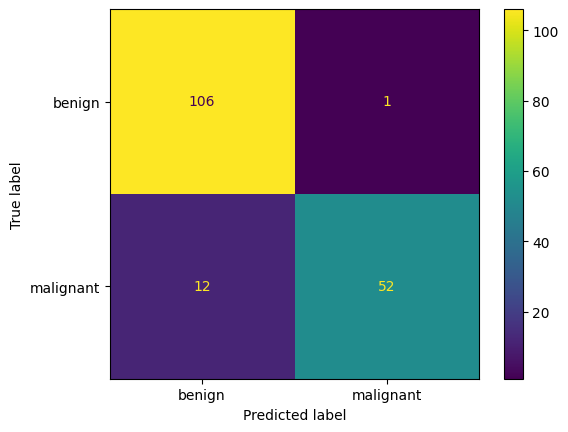

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [8]:
# calcoliamo l'accuratezza
# (Vero positivo + Vero negativo) / Previsioni totali
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('accuratezza: ', accuracy)

# calcoliamo la precisione
# Vero positivo / (Vero positivo + Falso positivo)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, pos_label='benign')
print('precisione: ', precision)

# calcoliamo la recall (sensitivity)
# Vero positivo / (Vero positivo + Falso negativo)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, pos_label='benign')
print('recall: ', recall)

# calcoliamo la specificità
# Vero negativo / (Vero negativo + Falso positivo)
specificity = recall_score(y_test, y_pred, pos_label='benign')
print('specificità: ', specificity)

# calcoliamo la F1 score
# 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label='benign')
print('F1 score: ', f1)

# calcoliamo il coefficiente di correlazione Kappa di Cohen
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)

def kappa_to_text(kappa):
    if kappa < 0:
        text =  "non c'è concordanza"
    elif kappa >= 0 and kappa < 0.4:
        text = "la concordanza è scarsa"
    elif kappa >= 0.4 and kappa < 0.6:
        text = "la concordanza è discreta"
    elif kappa >= 0.6 and kappa < 0.8:
        text = "la concordanza è buona"
    elif kappa >= 0.8 and kappa <= 1:
        text = "la concordanza è ottima"
    else:
        text = "errore"
    
    return kappa, text

print('Kappa di Cohen: ', kappa_to_text(kappa))

# stampiamo tutte le metriche con il report di classificazione
from sklearn.metrics import classification_report
print('\nReport di classificazione: ')
print(classification_report(y_test, y_pred))

accuratezza:  0.9239766081871345
precisione:  0.8983050847457628
recall:  0.9906542056074766
specificità:  0.9906542056074766
F1 score:  0.9422222222222222
Kappa di Cohen:  (0.8318838387657869, 'la concordanza è ottima')

Report di classificazione: 
              precision    recall  f1-score   support

      benign       0.90      0.99      0.94       107
   malignant       0.98      0.81      0.89        64

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171

